In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Soyabean_Volumes_Aggregated.xlsx to Soyabean_Volumes_Aggregated.xlsx


In [3]:
# Load the dataset
df = pd.read_excel('Soyabean_Volumes_Aggregated.xlsx')

In [4]:
# Split data into training and testing sets
train, test = train_test_split(df, test_size=0.2)


In [5]:
# Extract features and target variable
train_X = train.drop(columns=['Soyabean_Vols'])
train_y = train['Soyabean_Vols']
test_X = test.drop(columns=['Soyabean_Vols'])
test_y = test['Soyabean_Vols']


In [6]:
# Initialize the Gradient Boosting model
gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)


In [7]:
# Fit the model on the training data
gb_model.fit(train_X, train_y)


GradientBoostingRegressor(random_state=0)

In [8]:
# Make predictions on the testing data
predictions = gb_model.predict(test_X)


In [9]:
# Calculate the Mean Squared Error
mse = mean_squared_error(test_y, predictions)
print("Mean Squared Error: %.2f" % mse)

Mean Squared Error: 231820729582.60


In [10]:
rmse = np.sqrt(mse)

In [11]:
print('RMSE: {:.2f}'.format(rmse))

RMSE: 481477.65


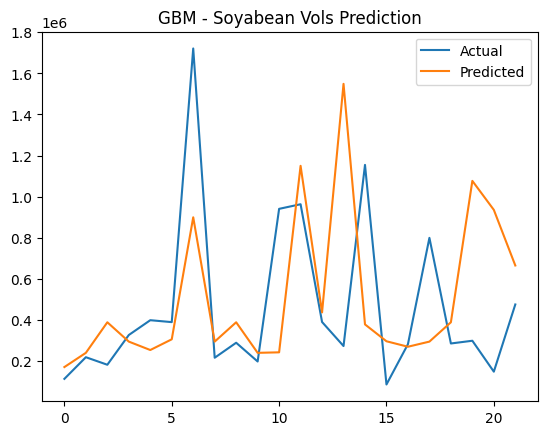

In [12]:
# Plot the actual and predicted values
plt.title('GBM - Soyabean Vols Prediction')
plt.plot(test_y.values, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()